In [8]:
import pandas as pd
import requests
import json

In [9]:
requests.get ('https://data.seattle.gov/resource/tmmm-ytt6.json')

<Response [200]>

In [5]:
import requests

query="Library_Data" #Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
request = requests.get(url)
json_response = request.json()
json_response

[{'usageclass': 'Digital',
  'checkouttype': 'OverDrive',
  'materialtype': 'EBOOK',
  'checkoutyear': '2023',
  'checkoutmonth': '2',
  'checkouts': '2',
  'title': 'Principle-Centered Leadership',
  'isbn': '9780795309496',
  'creator': 'Stephen R. Covey',
  'subjects': 'Self-Improvement, Nonfiction',
  'publisher': 'RosettaBooks',
  'publicationyear': '2012'},
 {'usageclass': 'Physical',
  'checkouttype': 'Horizon',
  'materialtype': 'SOUNDDISC',
  'checkoutyear': '2023',
  'checkoutmonth': '2',
  'checkouts': '2',
  'title': 'Eat to the beat / Blondie.',
  'creator': 'Blondie (Musical group)',
  'subjects': 'Rock music 1971 1980, New wave music',
  'publisher': 'Capitol/Chrysalis,',
  'publicationyear': '[2001]'},
 {'usageclass': 'Digital',
  'checkouttype': 'OverDrive',
  'materialtype': 'AUDIOBOOK',
  'checkoutyear': '2023',
  'checkoutmonth': '2',
  'checkouts': '1',
  'title': 'Delete All Suspects (unabridged)',
  'isbn': '9781666551358',
  'creator': 'Donna Andrews',
  'subjec

In [63]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Title", "Creator","Checkouts"])

# Sort the DataFrame by the number of checkouts in descending order
df_sorted = df.sort_values(by="Checkouts", ascending=False)

# Reset the index of the sorted DataFrame
df_sorted = df_sorted.reset_index(drop=True)

# Display the sorted DataFrame
df_sorted

,Usage Class,Checkout Year,Title,Creator,Checkouts
0,Physical,2023,A squash and a squeeze / story by Julia Donald...,"Donaldson, Julia",9
1,Physical,2023,The Polar Express / Castle Rock Entertainment ...,None,9
2,Digital,2023,Prank You Very Much,Lincoln Peirce,9
3,Digital,2023,The Fervor (unabridged),Alma Katsu,9
4,Physical,2023,The hidden oracle / Rick Riordan.,"Riordan, Rick",9
...,...,...,...,...,...
995,Digital,2023,Child of Flame,Kate Elliott,1
996,Physical,2023,"Maria, Maria : and other stories / Marytza K. ...","Rubio, Marytza K.",1
997,Physical,2023,A Bookshop in Berlin : the rediscovered memoir...,"Frenkel, Françoise, 1889-1975",1
998,Physical,2023,Siren's call / Jayne Castle.,"Castle, Jayne",1


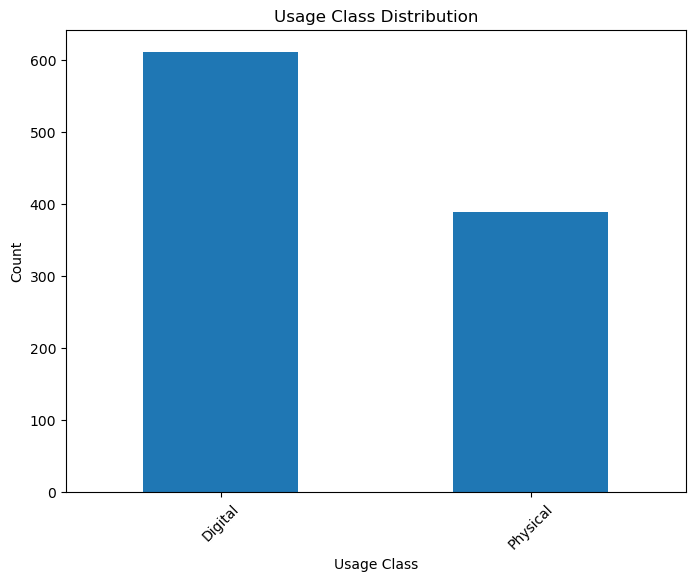

In [57]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the "usageclass" field from each record in the JSON response
usage_classes = [record.get("usageclass") for record in json_response]

# Create a pandas Series from the extracted "usageclass" data
usage_class_series = pd.Series(usage_classes)

# Count the occurrences of each "usageclass"
usage_class_counts = usage_class_series.value_counts()

# Create a bar plot to visualize the usage classes
plt.figure(figsize=(8, 6))
usage_class_counts.plot(kind='bar')
plt.title("Usage Class Distribution")
plt.xlabel("Usage Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [64]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Title", "Creator", "Checkouts"])

# Sort the DataFrame by the number of checkouts in descending order
df_sorted = df.sort_values(by="Checkouts", ascending=False)

# Reset the index of the sorted DataFrame
df_sorted = df_sorted.reset_index(drop=True)

# Display only the top ten records with title, creator, usage class, and checkouts
top_ten_records = df_sorted.head(10)[["Title", "Creator", "Usage Class", "Checkouts"]]
top_ten_records


,Title,Creator,Usage Class,Checkouts
0,A squash and a squeeze / story by Julia Donald...,"Donaldson, Julia",Physical,9
1,The Night Swim: A Novel (unabridged),Megan Goldin,Digital,9
2,The hidden oracle / Rick Riordan.,"Riordan, Rick",Physical,9
3,Shenanigans,Mercedes Lackey,Digital,9
4,Slow Birding: The Art and Science of Enjoying ...,Joan E. Strassmann,Digital,9
5,His Only Wife,Peace Adzo Medie,Digital,9
6,Supers : a little star past Cassiopeia / Frédé...,"Maupomé, Frédéric, 1974-",Physical,8
7,On Chesil Beach,Ian McEwan,Digital,8
8,Pug's got talent / by Kyla May.,"May, Kyla",Physical,8
9,I Know Who You Are: A Novel,Alice Feeney,Digital,8


In [66]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts"])

# Determine the period of time being analyzed
min_year = df["Checkout Year"].min()
max_year = df["Checkout Year"].max()
min_month = df["Checkout Month"].min()
max_month = df["Checkout Month"].max()

# Display the period of time being analyzed
print(f"Period of analysis: {min_month}-{min_year} to {max_month}-{max_year}")

# Display the DataFrame with title, creator, usage class, and checkouts
df[["Title", "Creator", "Usage Class", "Checkouts"]]

Period of analysis: 1-2023 to 3-2023


,Title,Creator,Usage Class,Checkouts
0,Principle-Centered Leadership,Stephen R. Covey,Digital,2
1,Eat to the beat / Blondie.,Blondie (Musical group),Physical,2
2,Delete All Suspects (unabridged),Donna Andrews,Digital,1
3,What Are Castles and Knights?,Sarah Fabiny,Digital,1
4,Do to the beast / Afghan Whigs.,Afghan Whigs (Musical group),Physical,1
...,...,...,...,...
995,Behind closed doors : [a novel] / B.A. Paris.,"Paris, B. A.",Physical,1
996,"Star Wars. Captain Phasma / writer, Kelly Thom...","Thompson, Kelly, 1976-",Physical,1
997,The Golden Key: Geronimo Stilton and the Kingd...,Geronimo Stilton,Digital,5
998,Palace of Spies,Sarah Zettel,Digital,1


In [73]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts"])

# Convert the "Checkouts" column to numeric dtype
df["Checkouts"] = pd.to_numeric(df["Checkouts"])

# Filter the DataFrame for physical and digital checkouts separately
physical_checkouts = df[df["Usage Class"] == "Physical"].nlargest(5, "Checkouts")
digital_checkouts = df[df["Usage Class"] == "Digital"].nlargest(5, "Checkouts")

# Display the top five checkouts in physical format
print("Top five checkouts in physical format:")
print(physical_checkouts[["Title", "Checkouts"]])

# Display the top five checkouts in digital format
print("Top five checkouts in digital format:")
print(digital_checkouts[["Title", "Checkouts"]])

Top five checkouts in physical format:
                                                 Title  Checkouts
302                     Uncataloged Folder or Bag--MAG         31
848  Motherless Brooklyn / Warner Bros. Pictures ; ...         22
966  Luminous : living things that light up the nig...         20
410  The fortunes of jaded women : a novel / Caroly...         18
862  If you were my valentine / written by Lynn Plo...         15
Top five checkouts in digital format:
                                                 Title  Checkouts
500  The Empress of Salt and Fortune: Singing Hills...         58
204                               Love and Other Words         55
134                              Ms. Demeanor: A Novel         48
200                               Rebecca (unabridged)         41
871                                   Ariadne: A Novel         34


In [76]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    subjects = record.get("subjects")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, subjects, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Subjects", "Checkouts"])

# Group the DataFrame by "Subjects" and calculate the total checkouts for each subject
checkouts_by_subject = df.groupby("Subjects")["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_subject = checkouts_by_subject.sort_values("Checkouts", ascending=False)

# Display the grouped data by subjects in descending order
print(checkouts_by_subject)


                                              Subjects Checkouts
99   Christmas plays, North Pole Juvenile drama, Fe...         9
114  Comic and Graphic Books, Juvenile Fiction, Hum...         9
145  Dwellings Juvenile fiction, Crowding stress Ju...         9
14   Apollo Deity Fiction, Gods Greek Fiction, Myth...         9
227      Fiction, Horror, Thriller, Historical Fiction         9
..                                                 ...       ...
401  Literature Examinations questions etc, Arts Ex...         1
399  Lincoln Mary Todd 1818 1882 Relations with Afr...         1
55    Biography & Autobiography, Sociology, Nonfiction         1
396  Laurents Arthur Juvenile literature, Dramatist...         1
629  Zarankin Julia 1974, Bird watchers Biography, ...         1

[630 rows x 2 columns]


In [79]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts"])

# Group the DataFrame by "Creator" and calculate the total checkouts for each author
checkouts_by_author = df.groupby("Creator")["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_author = checkouts_by_author.sort_values("Checkouts", ascending=False)

# Select the top 10 authors with the highest checkouts
top_10_authors = checkouts_by_author.head(10)

# Display the top 10 authors in descending order
print(top_10_authors)



                  Creator Checkouts
596       Mercedes Lackey         9
220      Donaldson, Julia         9
700         Riordan, Rick         9
589          Megan Goldin         9
659      Peace Adzo Medie         9
398    Joan E. Strassmann         9
766  Shelley Shepard Gray        87
348            Ian McEwan       811
618        Muriel Barbery         8
278       Gabino Iglesias         8


In [83]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    subjects = record.get("subjects")  # Add subjects field
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts, subjects])  # Include subjects in data

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts", "Subjects"])  # Add "Subjects" column

# Filter the DataFrame for usage class "Digital"
digital_df = df[df["Usage Class"] == "Digital"]

# Group the filtered DataFrame by "Creator" and calculate the total checkouts for each author
checkouts_by_author = digital_df.groupby(["Creator", "Subjects"])["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_author = checkouts_by_author.sort_values("Checkouts", ascending=False)

# Select the top 10 authors with the highest checkouts
top_10_authors = checkouts_by_author.head(10)

# Display the top 10 authors in descending order
print(top_10_authors)

                    Creator  \
24               Alma Katsu   
440        Peace Adzo Medie   
395            Megan Goldin   
346          Lincoln Peirce   
258      Joan E. Strassmann   
215              Ian McEwan   
511    Shelley Shepard Gray   
17             Alice Feeney   
331  Laura Mersini-Houghton   
189         Gabino Iglesias   

                                              Subjects Checkouts  
24       Fiction, Horror, Thriller, Historical Fiction         9  
440                                Fiction, Literature         9  
395                                  Fiction, Thriller         9  
346  Comic and Graphic Books, Juvenile Fiction, Hum...         9  
258                        Nature, New Age, Nonfiction         9  
215            Fiction, Literature, Historical Fiction       811  
511                          Fiction, Mystery, Romance         8  
17                                   Fiction, Thriller         8  
331  Biography & Autobiography, Science, Physics, N... 

In [82]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    subjects = record.get("subjects")  # Add subjects field
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts, subjects])  # Include subjects in data

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts", "Subjects"])  # Add "Subjects" column

# Filter the DataFrame for usage class "Physical"
physical_df = df[df["Usage Class"] == "Physical"]

# Group the filtered DataFrame by "Creator" and calculate the total checkouts for each author
checkouts_by_author = physical_df.groupby(["Creator", "Subjects"])["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_author = checkouts_by_author.sort_values("Checkouts", ascending=False)

# Select the top 10 authors with the highest checkouts
top_10_authors = checkouts_by_author.head(10)

# Display the top 10 authors in descending order
print(top_10_authors)

                      Creator  \
238             Riordan, Rick   
79           Donaldson, Julia   
145            Johnson, Dinah   
124           Hische, Jessica   
183  Maupomé, Frédéric, 1974-   
184                 May, Kyla   
47               Burach, Ross   
278              Taddeo, Lisa   
88                Ferry, Beth   
234             Ray, Mary Lyn   

                                              Subjects Checkouts  
238  Apollo Deity Fiction, Gods Greek Fiction, Myth...         9  
79   Dwellings Juvenile fiction, Crowding stress Ju...         9  
145  Girls Black Juvenile fiction, African diaspora...         8  
124  Kindness Pictorial works Juvenile fiction, Con...         8  
183  Abandoned children Comic books strips etc, Bro...         8  
184  Pug Juvenile fiction, Dogs Juvenile fiction, C...         8  
47   Bumblebees Juvenile fiction, Bees Juvenile fic...         7  
278  Grief Fiction, Dating services Fiction, Love F...         7  
88   Rabbits Juvenile fiction, Br

In [86]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    checkoutyear = record.get("checkoutyear")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([checkoutyear, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Checkout Year", "Creator", "Checkouts"])

# Group the DataFrame by "Checkout Year" and "Creator" and calculate the total checkouts for each combination
checkouts_by_year_creator = df.groupby(["Checkout Year", "Creator"])["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_year_creator = checkouts_by_year_creator.sort_values("Checkouts", ascending=False)

# Group the DataFrame by "Creator" and count the number of years each creator appears in the top rankings
creator_rankings = checkouts_by_year_creator.groupby("Creator").size().reset_index(name="Ranking Years")

# Filter the DataFrame to only include creators who appear in all years
consistently_top_creators = creator_rankings[creator_rankings["Ranking Years"] == len(df["Checkout Year"].unique())]

# Sort the DataFrame in ascending order based on the number of ranking years
consistently_top_creators = consistently_top_creators.sort_values("Ranking Years", ascending=True)

# Display the creators who consistently appear in the top rankings across different years in ascending order
print(consistently_top_creators)

                     Creator  Ranking Years
0                Abbi Glines              1
584          Melissa Fleming              1
585  Melvins (Musical group)              1
586           Merbeth, K. S.              1
587             Mercer Mayer              1
..                       ...            ...
299                Greg Bear              1
300         Greg van Eekhout              1
301          Gruber, Gary R.              1
290            Ginder, Grant              1
886          Катарина Тайкон              1

[887 rows x 2 columns]


In [88]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutmonth = record.get("checkoutmonth")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutmonth, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Month", "Creator", "Checkouts"])

# Convert "Checkouts" column to numeric
df["Checkouts"] = pd.to_numeric(df["Checkouts"], errors="coerce")

# Group the DataFrame by "Checkout Month", "Usage Class", and "Creator" and calculate the total checkouts for each combination
checkouts_by_month_class_creator = df.groupby(["Checkout Month", "Usage Class", "Creator"])["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_month_class_creator = checkouts_by_month_class_creator.sort_values("Checkouts", ascending=False)

# Group the DataFrame by "Checkout Month" and "Usage Class" and select the top ten authors for each combination
top_ten_authors_by_month_class = checkouts_by_month_class_creator.groupby(["Checkout Month", "Usage Class"]).apply(lambda x: x.nlargest(10, "Checkouts")).reset_index(drop=True)

# Display the top ten authors by month and usage class
print(top_ten_authors_by_month_class)

   Checkout Month Usage Class                      Creator  Checkouts
0               1     Digital                      Nghi Vo         58
1               1     Digital               Jennifer Saint         34
2               1     Digital               Philip K. Dick         28
3               1     Digital         Hunter Clarke Fields         26
4               1     Digital             Jesse Q. Sutanto         22
5               1     Digital                 Stuart Gibbs         21
6               1     Digital                  Ted Conover         19
7               1     Digital                  Lisa Jewell         19
8               1     Digital                 Erin Bennett         19
9               1     Digital                  Margo Price         19
10              1    Physical                   Kuo, Julia         20
11              1    Physical               Huynh, Carolyn         18
12              1    Physical                Plourde, Lynn         15
13              1   

In [90]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts"])

# Sort the DataFrame in descending order based on the checkouts
sorted_checkouts = df.sort_values("Checkouts", ascending=False)

# Select the top ten checkouts
top_ten_checkouts = sorted_checkouts.head(10)

# Display the top ten checkouts in descending order
print(top_ten_checkouts)

    Usage Class Checkout Year Checkout Month  \
331    Physical          2023              1   
883     Digital          2023              1   
684    Physical          2023              1   
202     Digital          2023              2   
444     Digital          2023              1   
496     Digital          2023              1   
500    Physical          2023              1   
125     Digital          2023              2   
860    Physical          2023              1   
147     Digital          2023              2   

                                                 Title  \
331  A squash and a squeeze / story by Julia Donald...   
883               The Night Swim: A Novel (unabridged)   
684                  The hidden oracle / Rick Riordan.   
202                                        Shenanigans   
444  Slow Birding: The Art and Science of Enjoying ...   
496                                      His Only Wife   
500  Supers : a little star past Cassiopeia / Frédé...   
125    

In [91]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&checkoutmonth=3&usageclass=Physical&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts"])

# Group the DataFrame by "Creator" and calculate the total checkouts for each author
checkouts_by_creator = df.groupby("Creator")["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
sorted_checkouts = checkouts_by_creator.sort_values("Checkouts", ascending=False)

# Display the result
print(sorted_checkouts)


                        Creator Checkouts
293               Hale, Shannon         9
181               Dewdney, Anna         9
452              Maas, Sarah J.         9
278              Grayson, Devin         9
18                   Aoki, Ryka         9
..                          ...       ...
504  Meredith, Anne, 1899-1973,         1
503               Mentink, Dana         1
500                  Mele, Dana         1
499              Meldrum, Carol         1
822               Ōmori, Fujino         1

[823 rows x 2 columns]


In [92]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&checkoutmonth=3&usageclass=Physical&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutyear = record.get("checkoutyear")
    checkoutmonth = record.get("checkoutmonth")
    title = record.get("title")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutyear, checkoutmonth, title, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Year", "Checkout Month", "Title", "Creator", "Checkouts"])

# Filter the DataFrame for usage class "Physical" and checkout month 3
physical_month_3 = df[(df["Usage Class"] == "Physical") & (df["Checkout Month"] == 3)]

# Group the DataFrame by "Creator" and calculate the total checkouts for each author
checkouts_by_creator = physical_month_3.groupby("Creator")["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
sorted_checkouts = checkouts_by_creator.sort_values("Checkouts", ascending=False)

# Select the top ten creators with the highest checkouts
top_ten_creators = sorted_checkouts.head(10)

# Display the result
print(top_ten_creators)

Empty DataFrame
Columns: [Creator, Checkouts]
Index: []


In [93]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutmonth = record.get("checkoutmonth")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutmonth, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Month", "Creator", "Checkouts"])

# Convert "Checkouts" column to numeric
df["Checkouts"] = pd.to_numeric(df["Checkouts"], errors="coerce")

# Group the DataFrame by "Checkout Month", "Usage Class", and "Creator" and calculate the total checkouts for each combination
checkouts_by_month_class_creator = df.groupby(["Checkout Month", "Usage Class", "Creator"])["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_month_class_creator = checkouts_by_month_class_creator.sort_values("Checkouts", ascending=False)

# Group the DataFrame by "Checkout Month" and "Usage Class" and select the top ten authors for each combination
top_ten_authors_by_month_class = checkouts_by_month_class_creator.groupby(["Checkout Month", "Usage Class"]).apply(lambda x: x.nlargest(10, "Checkouts")).reset_index(drop=True)

# Display the top ten authors by month and usage class
print(top_ten_authors_by_month_class)

   Checkout Month Usage Class                      Creator  Checkouts
0               1     Digital                      Nghi Vo         58
1               1     Digital               Jennifer Saint         34
2               1     Digital               Philip K. Dick         28
3               1     Digital         Hunter Clarke Fields         26
4               1     Digital             Jesse Q. Sutanto         22
5               1     Digital                 Stuart Gibbs         21
6               1     Digital                  Lisa Jewell         19
7               1     Digital                  Ted Conover         19
8               1     Digital                  Margo Price         19
9               1     Digital                 Erin Bennett         19
10              1    Physical                   Kuo, Julia         20
11              1    Physical               Huynh, Carolyn         18
12              1    Physical                Plourde, Lynn         15
13              1   

In [94]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutmonth = record.get("checkoutmonth")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutmonth, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Month", "Creator", "Checkouts"])

# Convert "Checkouts" column to numeric
df["Checkouts"] = pd.to_numeric(df["Checkouts"], errors="coerce")

# Group the DataFrame by "Checkout Month", "Usage Class", and "Creator" and calculate the total checkouts for each combination
checkouts_by_month_class_creator = df.groupby(["Checkout Month", "Usage Class", "Creator"])["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_month_class_creator = checkouts_by_month_class_creator.sort_values("Checkouts", ascending=False)

# Group the DataFrame by "Checkout Month" and "Usage Class" and select the top ten authors for each combination
top_ten_authors_by_month_class = checkouts_by_month_class_creator.groupby(["Checkout Month", "Usage Class"]).apply(lambda x: x.nlargest(10, "Checkouts")).reset_index(drop=True)

# Display the top ten authors by month and usage class
print(top_ten_authors_by_month_class)

   Checkout Month Usage Class                      Creator  Checkouts
0               1     Digital                      Nghi Vo         58
1               1     Digital               Jennifer Saint         34
2               1     Digital               Philip K. Dick         28
3               1     Digital         Hunter Clarke Fields         26
4               1     Digital             Jesse Q. Sutanto         22
5               1     Digital                 Stuart Gibbs         21
6               1     Digital                  Lisa Jewell         19
7               1     Digital                  Ted Conover         19
8               1     Digital                  Margo Price         19
9               1     Digital                 Erin Bennett         19
10              1    Physical                   Kuo, Julia         20
11              1    Physical               Huynh, Carolyn         18
12              1    Physical                Plourde, Lynn         15
13              1   

In [95]:
import requests
import pandas as pd

query = "Library_Data"  # Define query
url = f"https://data.seattle.gov/resource/tmmm-ytt6.json?checkoutyear=2023&$limit=1000&$offset=1000"
response = requests.get(url)
json_response = response.json()

# Extract the desired fields from each record in the JSON response
data = []
for record in json_response:
    usageclass = record.get("usageclass")
    checkoutmonth = record.get("checkoutmonth")
    creator = record.get("creator")
    checkouts = record.get("checkouts")
    data.append([usageclass, checkoutmonth, creator, checkouts])

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Usage Class", "Checkout Month", "Creator", "Checkouts"])

# Convert "Checkouts" column to numeric
df["Checkouts"] = pd.to_numeric(df["Checkouts"], errors="coerce")

# Group the DataFrame by "Checkout Month", "Usage Class", and "Creator" and calculate the total checkouts for each combination
checkouts_by_month_class_creator = df.groupby(["Checkout Month", "Usage Class", "Creator"])["Checkouts"].sum().reset_index()

# Sort the DataFrame in descending order based on the total checkouts
checkouts_by_month_class_creator = checkouts_by_month_class_creator.sort_values("Checkouts", ascending=False)

# Group the DataFrame by "Checkout Month" and "Usage Class" and select the top ten authors for each combination
top_ten_authors_by_month_class = checkouts_by_month_class_creator.groupby(["Checkout Month", "Usage Class"]).apply(lambda x: x.nlargest(10, "Checkouts")).reset_index(drop=True)

# Display the top ten authors by month and usage class
print(top_ten_authors_by_month_class)

   Checkout Month Usage Class                      Creator  Checkouts
0               1     Digital                      Nghi Vo         58
1               1     Digital               Jennifer Saint         34
2               1     Digital               Philip K. Dick         28
3               1     Digital         Hunter Clarke Fields         26
4               1     Digital             Jesse Q. Sutanto         22
5               1     Digital                 Stuart Gibbs         21
6               1     Digital                  Ted Conover         19
7               1     Digital                  Lisa Jewell         19
8               1     Digital                 Erin Bennett         19
9               1     Digital                  Margo Price         19
10              1    Physical                   Kuo, Julia         20
11              1    Physical               Huynh, Carolyn         18
12              1    Physical                Plourde, Lynn         15
13              1   